# Stroke Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.isnull().sum()/len(df)*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [8]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [9]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [11]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [12]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

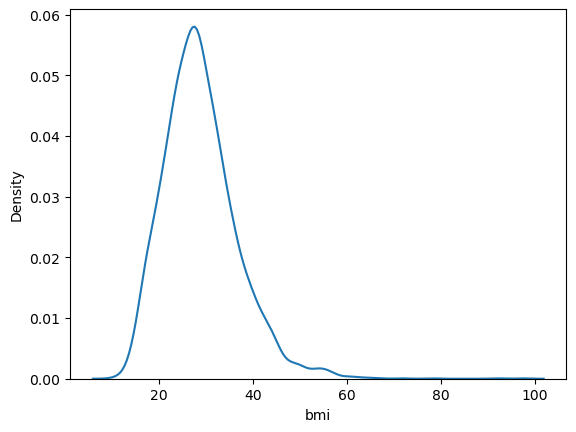

In [13]:
sns.kdeplot(data=df,x='bmi');

In [14]:
df['bmi']= df['bmi'].fillna(df['bmi'].mean())

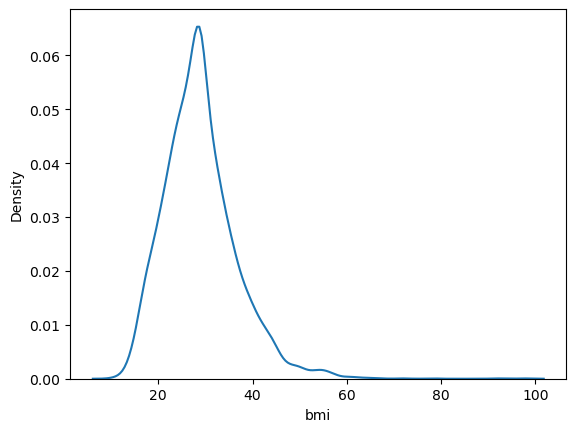

In [15]:
sns.kdeplot(data=df,x='bmi');

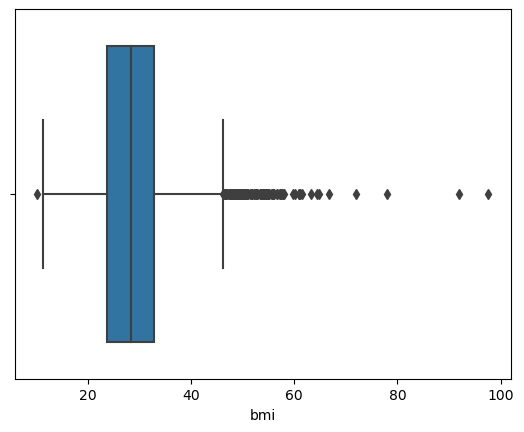

In [16]:
sns.boxplot(data=df,x='bmi');

In [17]:
from scipy.stats import zscore
df['Z_bmi']=zscore(df['bmi'])

In [18]:
len(df[(df['Z_bmi']<-3) | (df['Z_bmi']>3)])

59

In [19]:
df=df[(df['Z_bmi']>-3) & (df['Z_bmi']<3)]
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Z_bmi
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1.001234e+00
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,1.384666e-15
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,4.685773e-01
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,7.154182e-01
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,-6.357112e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,1.384666e-15
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,1.442949e+00
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,2.217363e-01
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,-4.278451e-01


In [20]:
df=df.loc[(df['Z_bmi']>-3) & (df['Z_bmi']<3)]
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Z_bmi
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1.001234e+00
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,1.384666e-15
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,4.685773e-01
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,7.154182e-01
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,-6.357112e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,1.384666e-15
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,1.442949e+00
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,2.217363e-01
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,-4.278451e-01


In [21]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Z_bmi
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1.001234e+00
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,1.384666e-15
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,4.685773e-01
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,7.154182e-01
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,-6.357112e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,1.384666e-15
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,1.442949e+00
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,2.217363e-01
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,-4.278451e-01


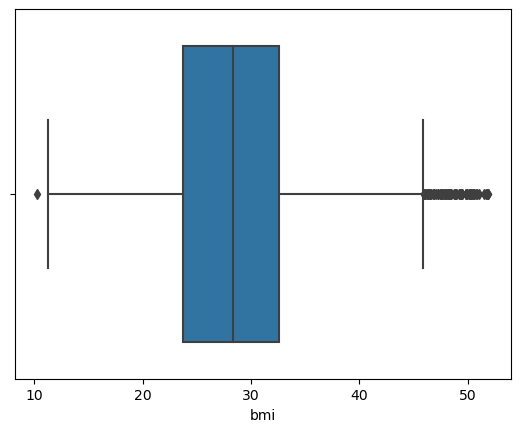

In [22]:
sns.boxplot(data=df,x='bmi');

In [23]:
df=df.drop('Z_bmi',axis=True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [24]:
df['Z_avg_glucose_level']=zscore(df['avg_glucose_level'])

In [25]:
df=df[(df['Z_avg_glucose_level']>-3) & (df['Z_avg_glucose_level']<3)]
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Z_avg_glucose_level
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,2.723636
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,2.135979
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,-0.000936
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1.448455
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,1.512592
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,-0.492944
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,0.426935
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,-0.509810
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,1.338824


In [26]:
df=df.loc[(df['Z_avg_glucose_level']>-3) & (df['Z_avg_glucose_level']<3)]
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Z_avg_glucose_level
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,2.723636
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,2.135979
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,-0.000936
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1.448455
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,1.512592
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,-0.492944
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,0.426935
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,-0.509810
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,1.338824


In [27]:
df=df.drop('Z_avg_glucose_level',axis=True)


# Visualisation

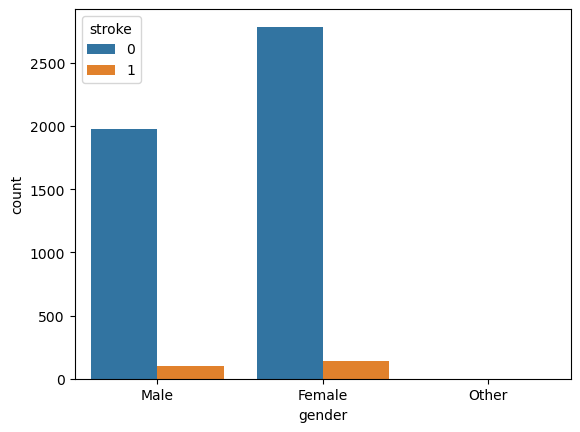

In [28]:
sns.countplot(data=df,x='gender',hue='stroke');

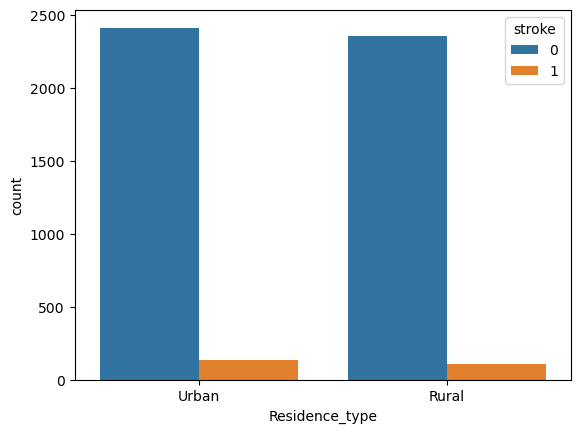

In [29]:
sns.countplot(data=df,x='Residence_type',hue='stroke');

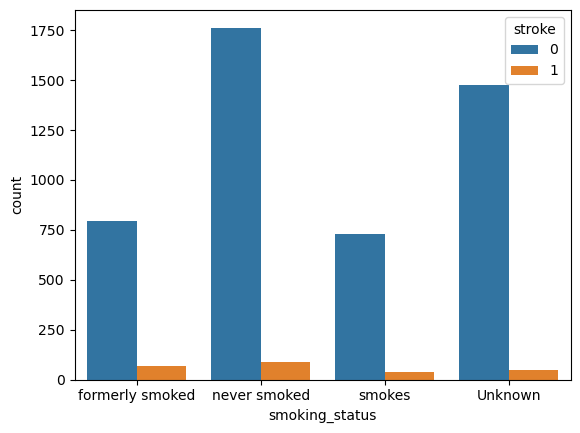

In [30]:
sns.countplot(data=df,x='smoking_status',hue='stroke');

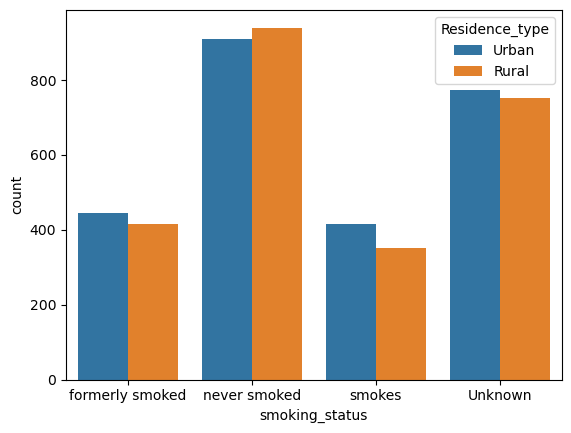

In [31]:
sns.countplot(data=df,x='smoking_status',hue='Residence_type');

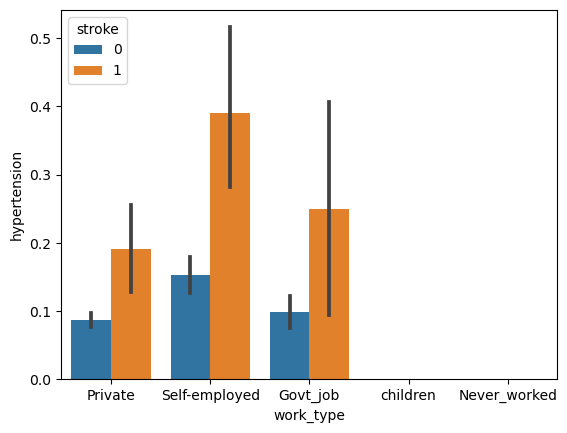

In [32]:
sns.barplot(data=df,x='work_type',y='hypertension',hue='stroke');

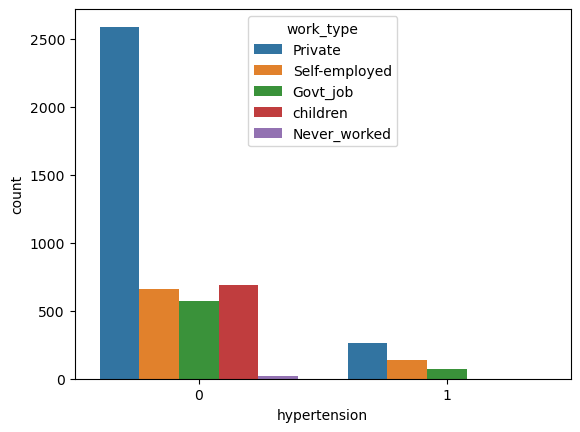

In [33]:
sns.countplot(data=df,x='hypertension',hue='work_type');

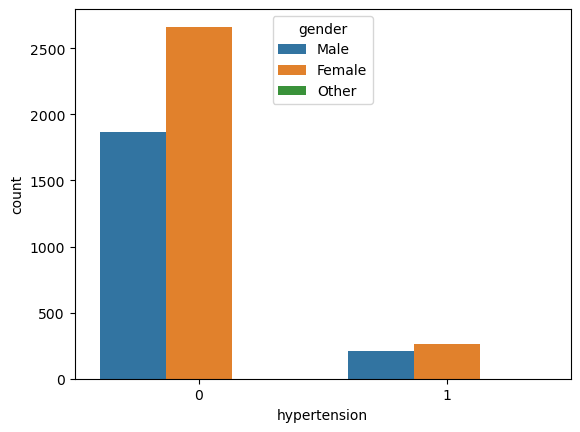

In [34]:
sns.countplot(data=df,x='hypertension',hue='gender');

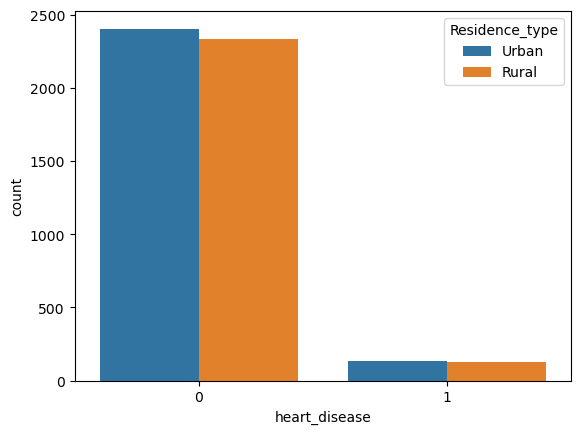

In [35]:
sns.countplot(data=df,x='heart_disease',hue='Residence_type');

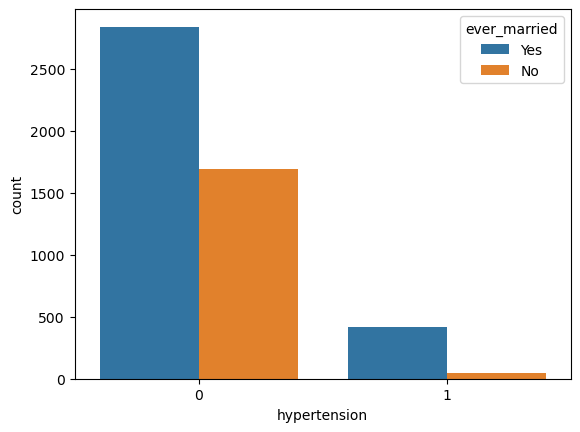

In [36]:
sns.countplot(data=df,x='hypertension',hue='ever_married');

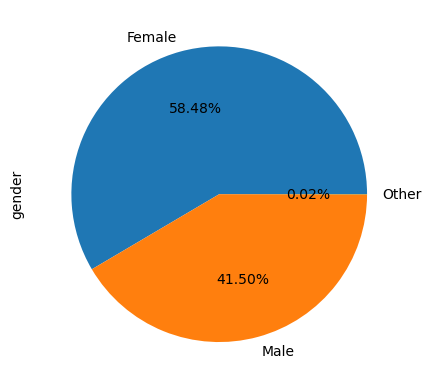

In [37]:
df['gender'].value_counts().plot(kind='pie',autopct='%0.2f%%',explode=(0,0,0));


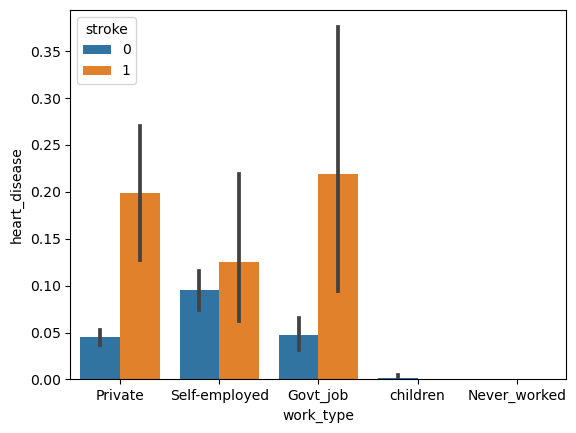

In [38]:
sns.barplot(data=df,x='work_type',y='heart_disease',hue='stroke');

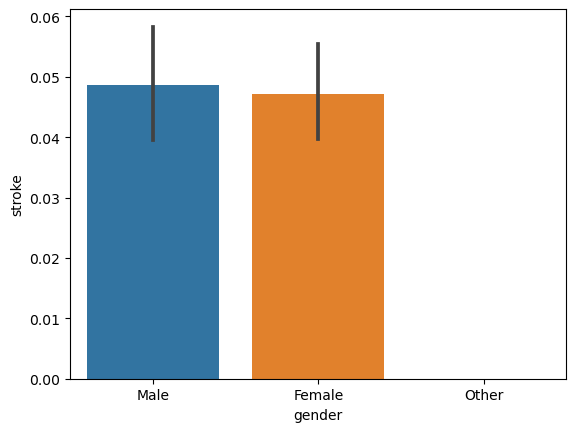

In [39]:
sns.barplot(data=df,x='gender',y='stroke');

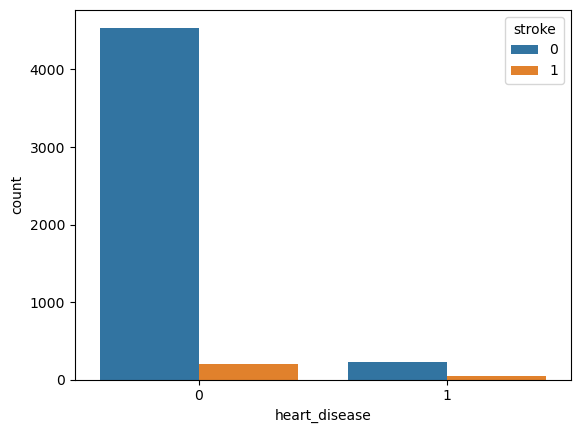

In [40]:
sns.countplot(data=df,x='heart_disease',hue='stroke');

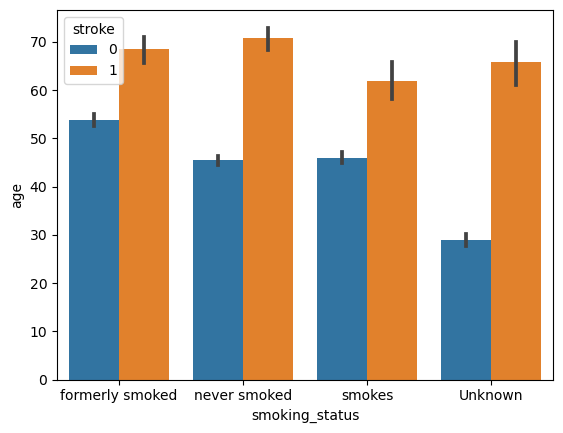

In [41]:
sns.barplot(data=df,x='smoking_status',y='age',hue='stroke');

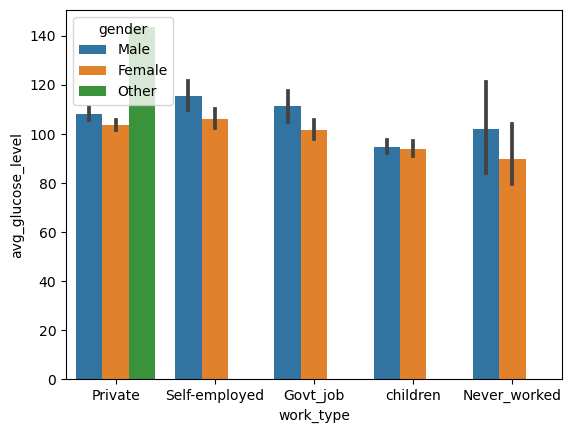

In [42]:
sns.barplot(data=df,x='work_type',y='avg_glucose_level',hue='gender');

In [43]:
df['stroke'].unique()

array([1, 0], dtype=int64)

In [44]:
df['gender']=df['gender'].map({'Male':1,'Female':2,'Other':3})
df['ever_married']=df['ever_married'].map({'Yes':1,'No':0})
df['work_type']=df['work_type'].map({'Private':1,'Self-employed':2,'Govt_job':3,'children':4,'Never_worked':5})
df['Residence_type']=df['Residence_type'].map({'Urban':1,'Rural':0})
df['smoking_status']=df['smoking_status'].map({'never smoked':1,'formerly smoked':2,'Unknown':3,'smokes':4})
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,1,1,228.69,36.600000,2,1
1,51676,2,61.0,0,0,1,2,0,202.21,28.893237,1,1
2,31112,1,80.0,0,1,1,1,0,105.92,32.500000,1,1
3,60182,2,49.0,0,0,1,1,1,171.23,34.400000,4,1
4,1665,2,79.0,1,0,1,2,0,174.12,24.000000,1,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5002 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5002 non-null   int64  
 1   gender             5002 non-null   int64  
 2   age                5002 non-null   float64
 3   hypertension       5002 non-null   int64  
 4   heart_disease      5002 non-null   int64  
 5   ever_married       5002 non-null   int64  
 6   work_type          5002 non-null   int64  
 7   Residence_type     5002 non-null   int64  
 8   avg_glucose_level  5002 non-null   float64
 9   bmi                5002 non-null   float64
 10  smoking_status     5002 non-null   int64  
 11  stroke             5002 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 508.0 KB


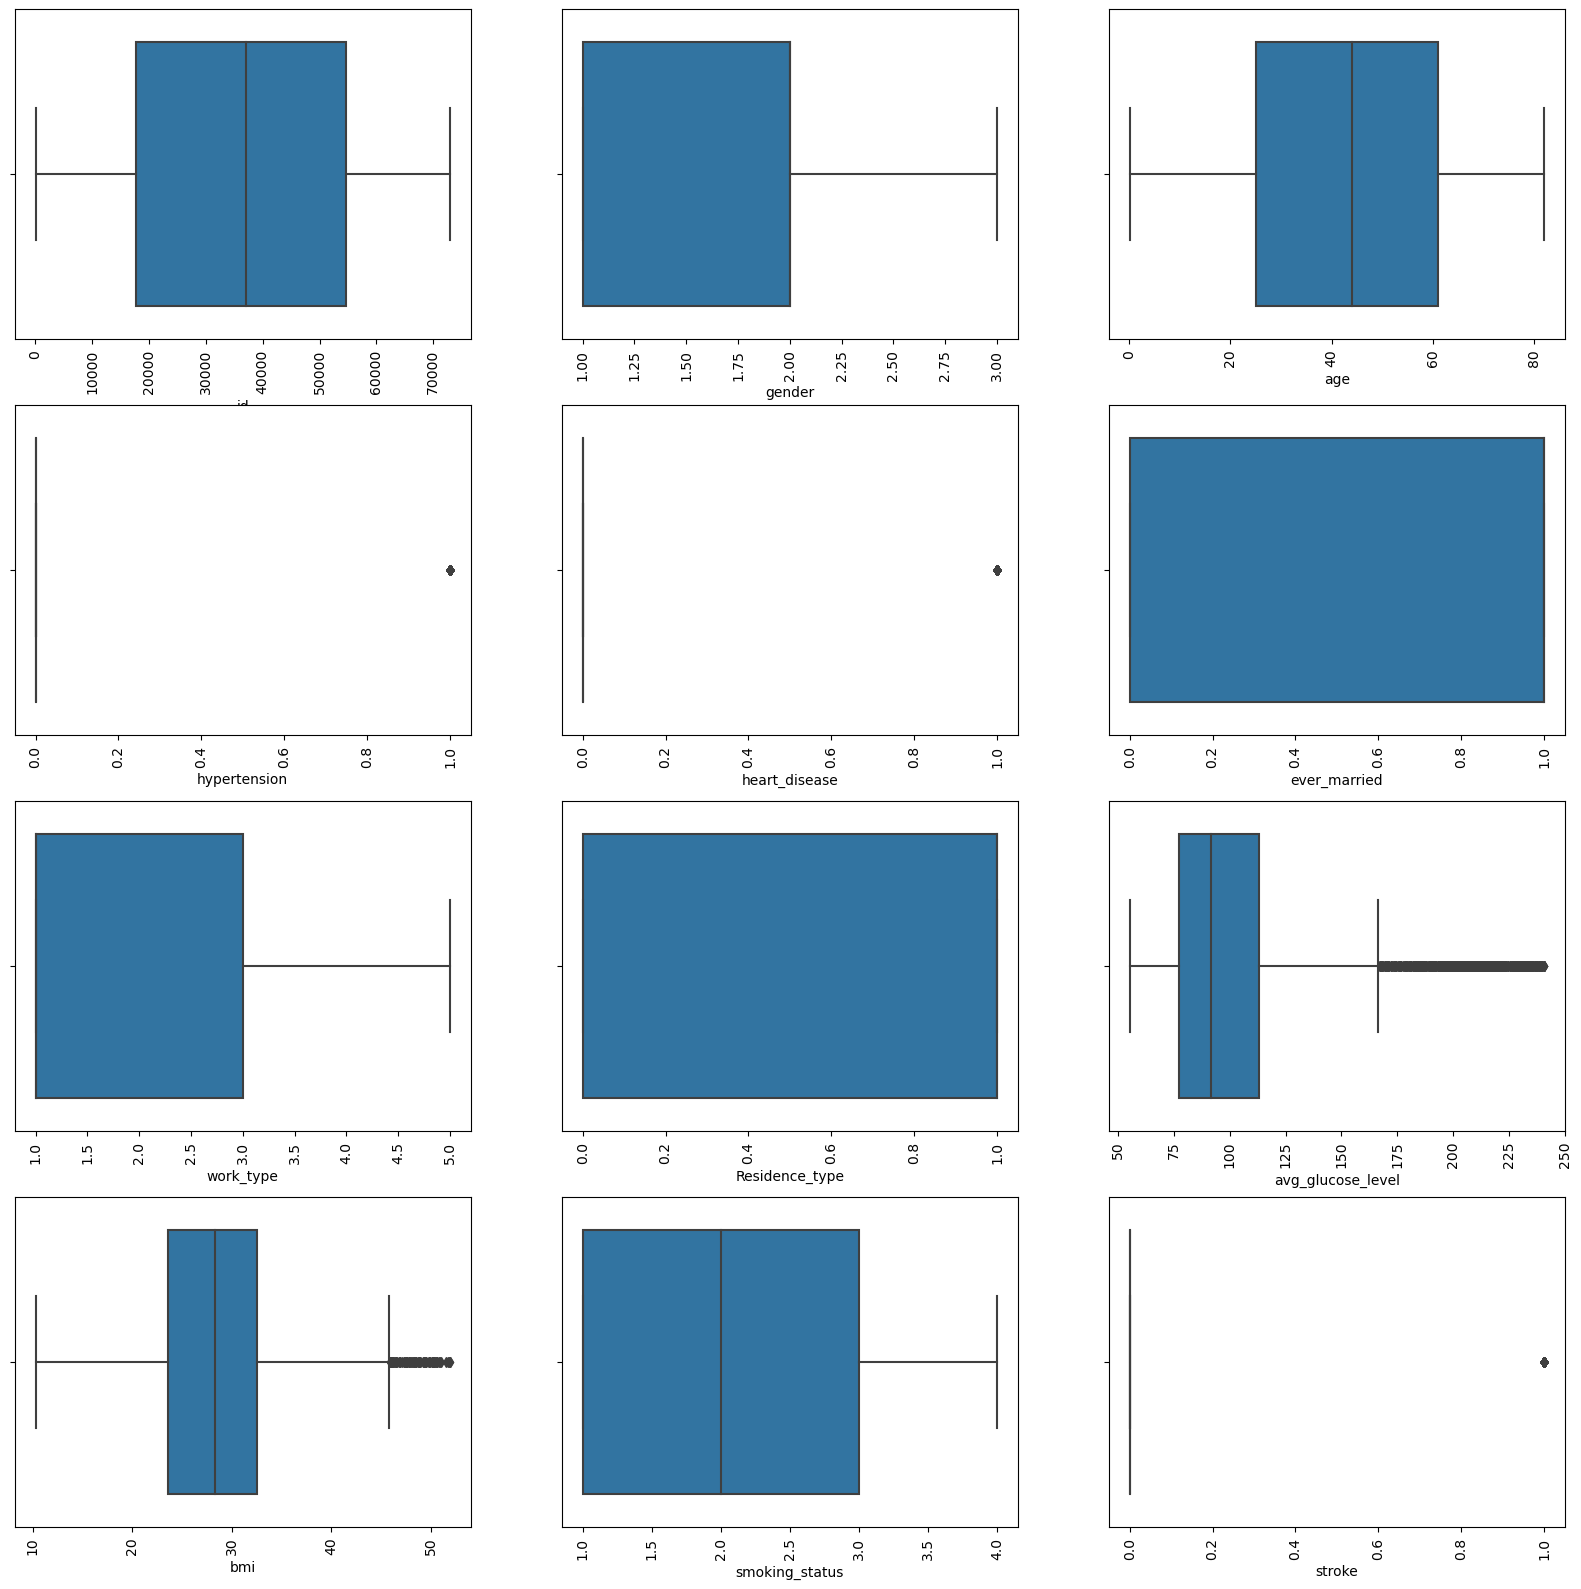

In [46]:
plt.figure(figsize=(20,30))
for i in enumerate(df):
    plt.subplot(6,3,i[0]+1)
    sns.boxplot(i[1],hue='stroke',data=df)
    plt.xticks(rotation=90)

<AxesSubplot:>

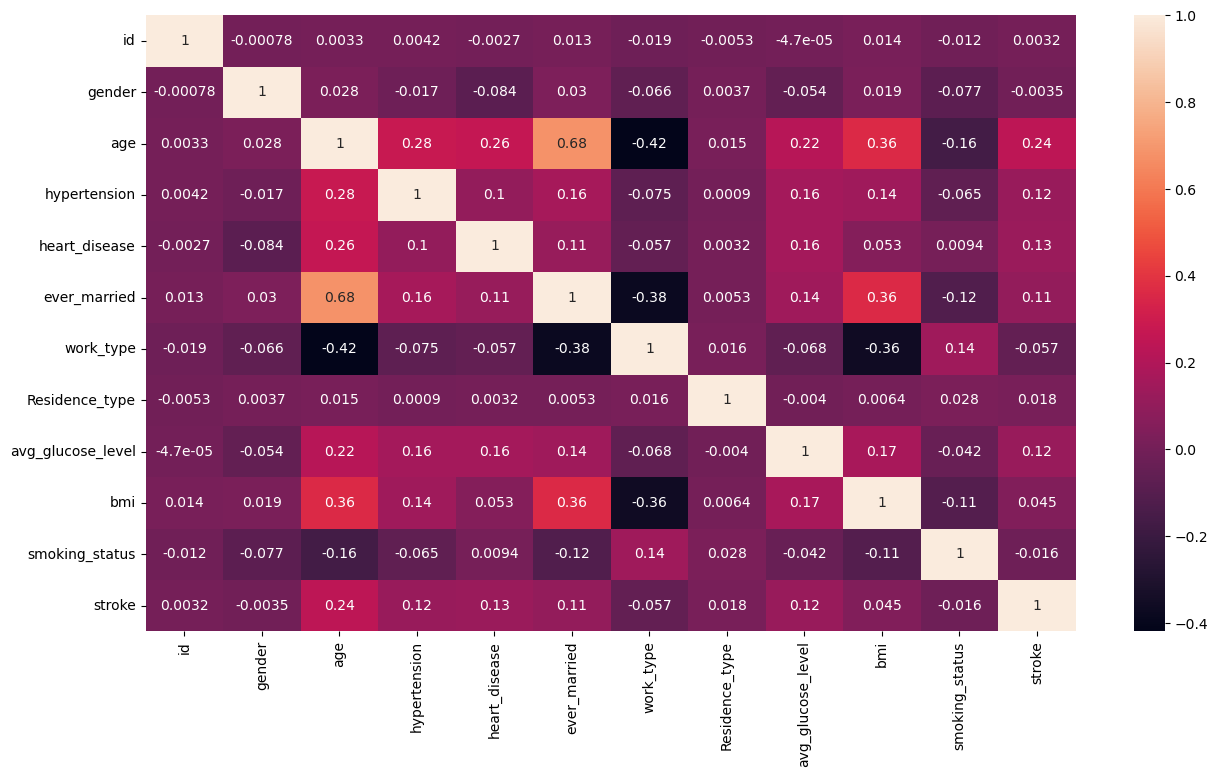

In [47]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [48]:
df=df.drop('id',axis=1)

In [49]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.600000,2,1
1,2,61.0,0,0,1,2,0,202.21,28.893237,1,1
2,1,80.0,0,1,1,1,0,105.92,32.500000,1,1
3,2,49.0,0,0,1,1,1,171.23,34.400000,4,1
4,2,79.0,1,0,1,2,0,174.12,24.000000,1,1


In [50]:
X=df.drop('stroke',axis=1)
X.shape

(5002, 10)

In [51]:
Y=df['stroke']
Y.shape

(5002,)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.20, random_state=0)

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr=LogisticRegression()

In [56]:
lr.fit(X_train, Y_train)

LogisticRegression()

In [57]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
cm = confusion_matrix(Y_test, y_pred)

In [60]:
cm

array([[951,   2],
       [ 47,   1]], dtype=int64)

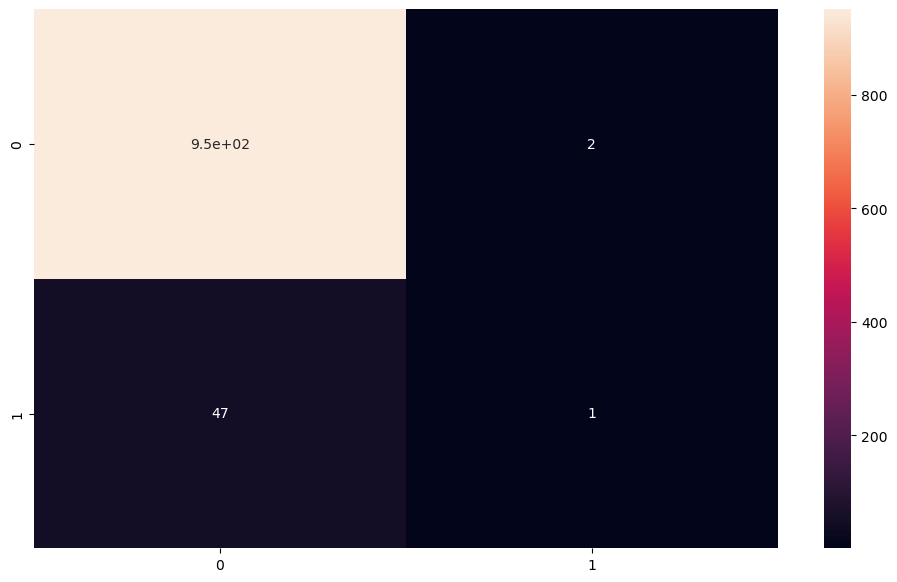

In [61]:
plt.figure(figsize=(12,7))
sns.heatmap(cm, annot=True)
plt.show()

In [62]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       953
           1       0.33      0.02      0.04        48

    accuracy                           0.95      1001
   macro avg       0.64      0.51      0.51      1001
weighted avg       0.92      0.95      0.93      1001



In [63]:
from sklearn.metrics import roc_auc_score

In [64]:
from sklearn.metrics import roc_curve

In [65]:
lr.score(X_train,Y_train)

0.9522619345163709

In [66]:
lr.score(X_test,Y_test)

0.951048951048951

In [67]:
score = roc_auc_score(Y_test, y_pred)

In [68]:
score

0.5093673487233298

In [69]:
fpr,tpr,thresholds = roc_curve(Y_test, y_pred)

In [70]:
thresholds

array([2, 1, 0], dtype=int64)

In [71]:
fpr

array([0.        , 0.00209864, 1.        ])

In [72]:
tpr

array([0.        , 0.02083333, 1.        ])

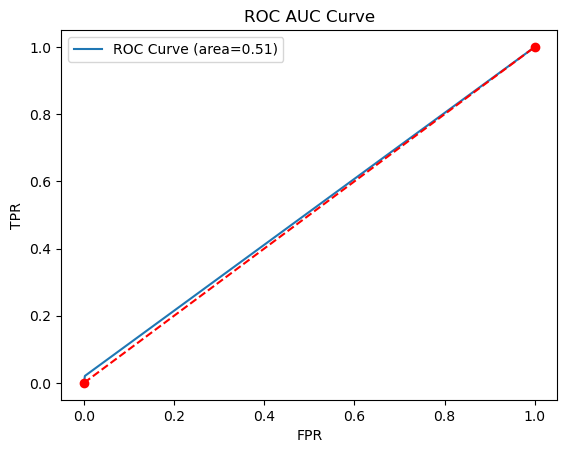

In [73]:

plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % score)
plt.plot([0,1], [0,1], 'ro--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

# Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3)

In [75]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [76]:
dt.feature_importances_

array([0.        , 0.73440688, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.19870307, 0.06689005, 0.        ])

In [77]:
y_pr=dt.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(Y_test, y_pr)

0.9500499500499501

In [80]:
from sklearn import tree

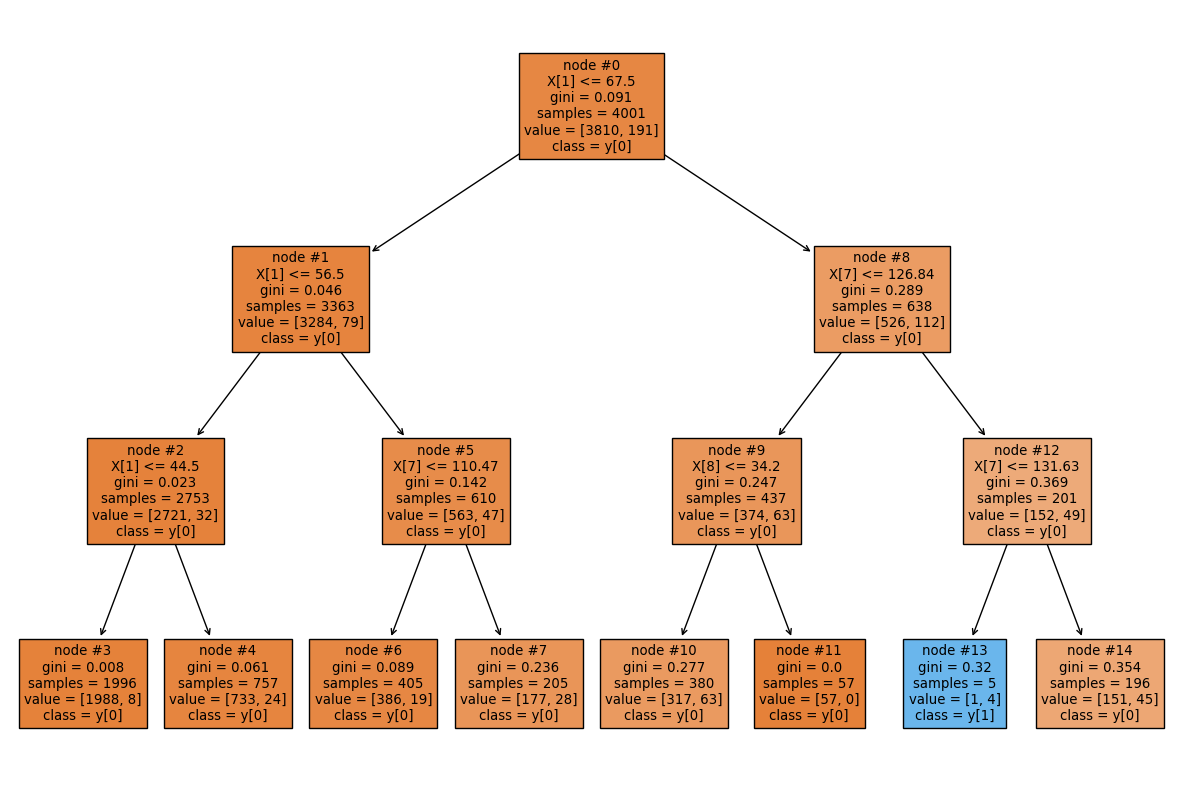

In [81]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True,class_names=True,node_ids=True)
plt.show()

# Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf=RandomForestClassifier(n_estimators=10)

In [84]:
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10)

In [85]:
y_prd = rf.predict(X_test)

In [86]:
y_prd

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
accuracy_score(Y_test, y_prd)

0.9440559440559441

# KNN Algorithm

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [89]:
knn = KNeighborsClassifier(n_neighbors=1)

In [90]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [91]:
Y_test

3102    0
980     0
597     0
1196    0
3932    0
       ..
1197    0
1131    0
2570    0
4742    0
2048    0
Name: stroke, Length: 1001, dtype: int64

In [92]:
pred = knn.predict(X_test)

In [93]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
print(confusion_matrix(Y_test, pred))

[[904  49]
 [ 40   8]]


In [95]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       953
           1       0.14      0.17      0.15        48

    accuracy                           0.91      1001
   macro avg       0.55      0.56      0.55      1001
weighted avg       0.92      0.91      0.91      1001



In [96]:
accuracy_score(Y_test, pred)

0.9110889110889111

# Choosing a best k-value

In [97]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X,Y,cv=10)
    accuracy_rate.append(score.mean())


In [98]:
score

array([0.95209581, 0.95209581, 0.952     , 0.952     , 0.952     ,
       0.952     , 0.952     , 0.952     , 0.952     , 0.954     ])

In [99]:
accuracy_rate

[0.9164331337325349,
 0.9476219560878244,
 0.9404263473053891,
 0.9492211576846307,
 0.9454215568862274,
 0.9510195608782434,
 0.9502195608782434,
 0.9512191616766467,
 0.9498195608782435,
 0.9520191616766468,
 0.9514195608782435,
 0.9518191616766467,
 0.9518191616766467,
 0.9522191616766467,
 0.9520191616766468,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467,
 0.9522191616766467]

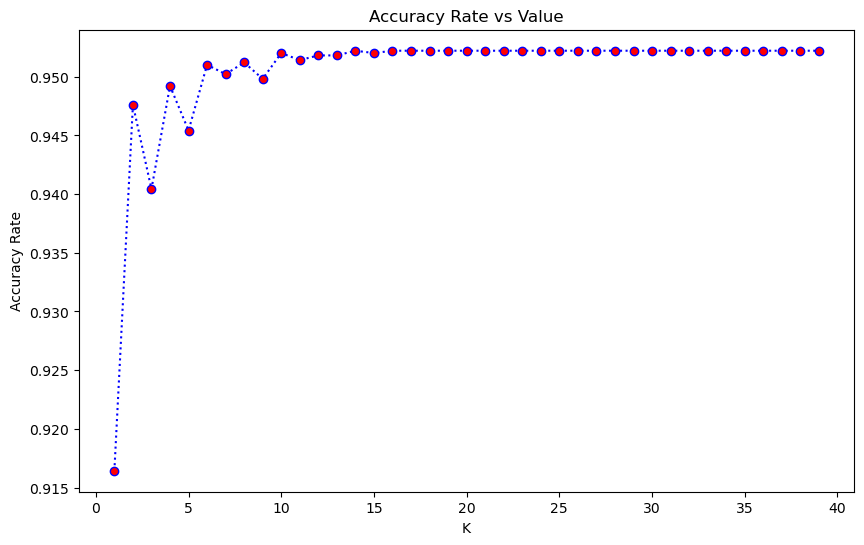

In [100]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40), accuracy_rate, color='blue', linestyle='dotted', marker='o', markerfacecolor='red')

plt.title('Accuracy Rate vs Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

In [101]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=Y_test))

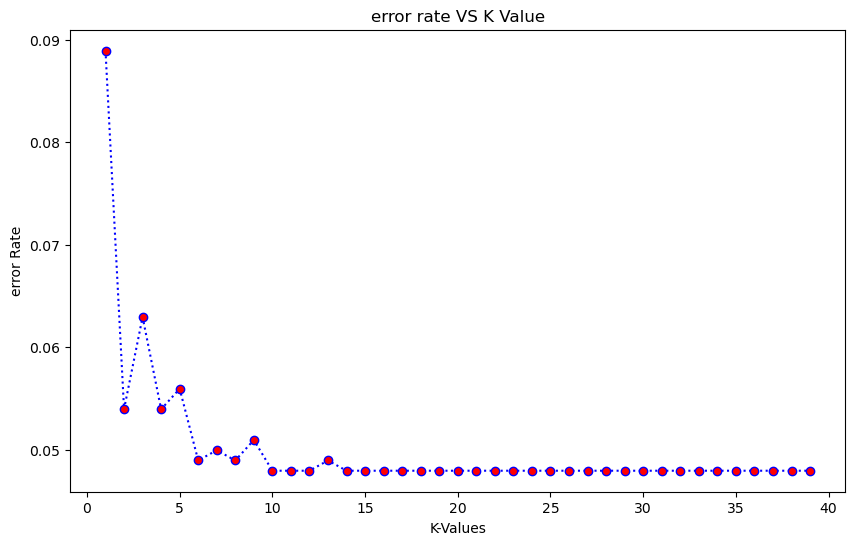

In [102]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dotted', marker='o', markerfacecolor='red')
plt.title('error rate VS K Value')
plt.xlabel('K-Values')
plt.ylabel('error Rate')
plt.show()

In [103]:
knn = KNeighborsClassifier(n_neighbors=23)
model = knn.fit(X_train, Y_train)
y_pred4 = model.predict((X_test))
print('Acc_Score:',accuracy_score(Y_test,y_pred4))  

Acc_Score: 0.952047952047952
